</b>Using clustering algorithm to segment customers</b>

</b> Purpose of the project</b>


In [1]:
 pip install extras

Note: you may need to restart the kernel to use updated packages.


import required module

In [2]:
%load_ext autoreload
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
%matplotlib inline
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.io as pio

load data 

In [3]:
file = "C:/Users/super/OneDrive - The University of Tokyo/Data Science portfolio/Business application of Data science/customers.csv"

In [4]:
customers = pd.read_csv(file)

In [5]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
customers.shape

(200, 5)

Reconfirming the data since k-means cannot be used with uncompleted data

In [7]:
#null data 
customers.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
# check duplicate data
customers.duplicated().sum()

0

In [9]:
customers.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

the conclusion from the reconfirmation process 

there is no missing value and there is no duplicate value. 


Observing the distribution of data 

it is wise to check the desciptive statistic and distribution

the descriptive statistcs => mean ,standard deviation, median and variance. I
not numeric variable => the counts in each category.

In [10]:
def statistics(variable):
    if variable.dtype == "int64" or variable.dtype == "float64":
        return pd.DataFrame([[variable.name, np.mean(variable), np.std(variable), np.median(variable), np.var(variable)]], 
                            columns = ["Variable", "Mean", "Standard Deviation", "Median", "Variance"]).set_index("Variable")
    else:
        return pd.DataFrame(variable.value_counts())

In [11]:
# grpah visualization with histogram and bell curve distribution
def graph_visualization(x):
    if x.dtype == "int64" or x.dtype == "float64":
        # Select size of bins by getting maximum and minimum and divide the substraction by 10
        size_bins = 10
        # Get the title by getting the name of the column
        title = x.name
        #Assign random colors to each graph
        color_kde = list(map(float, np.random.rand(3,)))
        color_bar = list(map(float, np.random.rand(3,)))

        # Plot the displot
        sns.distplot(x, bins=size_bins, kde_kws={"lw": 1.5, "alpha":0.8, "color":color_kde},
                       hist_kws={"linewidth": 1.5, "edgecolor": "grey",
                                "alpha": 0.4, "color":color_bar})
        # Customize ticks and labels
        plt.xticks(size=14)
        plt.yticks(size=14);
        plt.ylabel("Frequency", size=16, labelpad=15);
        # Customize title
        plt.title(title, size=18)
        # Customize grid and axes visibility
        plt.grid(False);
        plt.gca().spines["top"].set_visible(False);
        plt.gca().spines["right"].set_visible(False);
        plt.gca().spines["bottom"].set_visible(False);
        plt.gca().spines["left"].set_visible(False);
        
    else:
        x = pd.DataFrame(x)
        # Plot       
        sns.catplot(x=x.columns[0], kind="count", palette="spring", data=x)
        # Customize title
        title = x.columns[0]
        plt.title(title, size=18)
        # Customize ticks and labels
        plt.xticks(size=14)
        plt.yticks(size=14);
        plt.xlabel("")
        plt.ylabel("Counts", size=16, labelpad=15);        
        # Customize grid and axes visibility
        plt.gca().spines["top"].set_visible(False);
        plt.gca().spines["right"].set_visible(False);
        plt.gca().spines["bottom"].set_visible(False);
        plt.gca().spines["left"].set_visible(False);

In [12]:
# let's visualization 
spending = customers["Spending Score (1-100)"]


In [13]:
statistics(spending)

,Mean,Standard Deviation,Median,Variance
Variable,,,,
Spending Score (1-100),50.2,25.758882,50.0,663.52


C:\Users\super\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



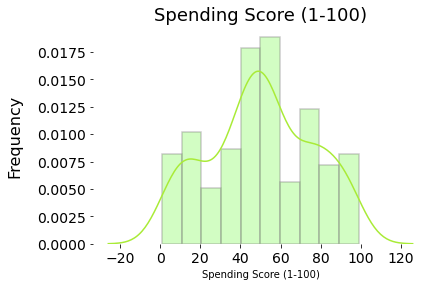

In [14]:
graph_visualization(spending)

In [15]:
Age = customers["Age"]


In [16]:
statistics(Age)

,Mean,Standard Deviation,Median,Variance
Variable,,,,
Age,38.85,13.934041,36.0,194.1575


C:\Users\super\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



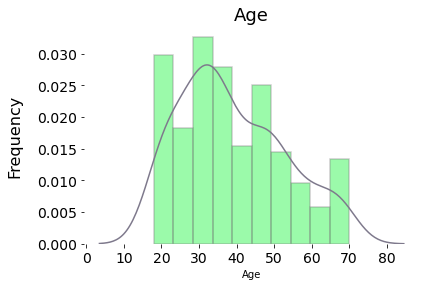

In [17]:
graph_visualization(Age)

In [18]:
income = customers["Annual Income (k$)"]


In [19]:
statistics(income)

,Mean,Standard Deviation,Median,Variance
Variable,,,,
Annual Income (k$),60.56,26.198977,61.5,686.3864


C:\Users\super\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



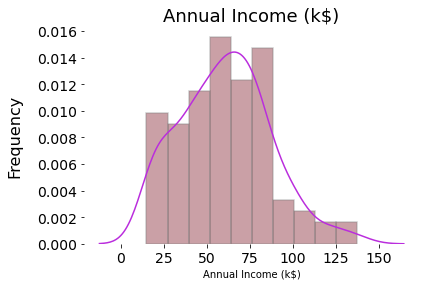

In [20]:
graph_visualization(income)

Correlation between parameteres

It is wise to analyze the relationship between the numeric parameter.

In this case,we'll use the pairplot seaborn function. We want to see whether there is a difference between gende(on other variables)


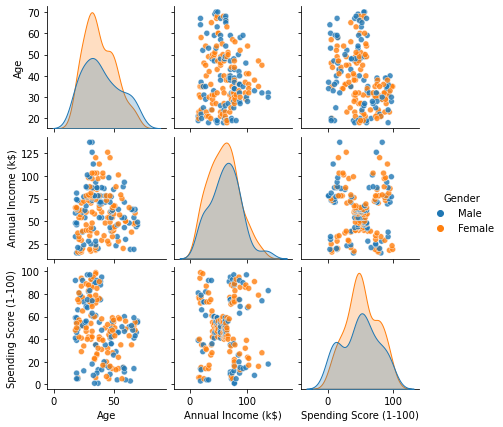

In [21]:
sns.pairplot(customers, x_vars = ["Age", "Annual Income (k$)", "Spending Score (1-100)"], 
               y_vars = ["Age", "Annual Income (k$)", "Spending Score (1-100)"], 
               hue = "Gender", 
               kind= "scatter",
               height = 2,
               plot_kws={"s": 35, "alpha": 0.8});
# the idea to check there is a differnce between gender(on other variables)

from the above distribution curve, we see that the data normally distributed.

Also, the distribution in male and female group seems to be the same.

Also, we see the the there is a little correlation between each variable.

Understanding and Visualizing Data

In [62]:
corr = train.corr()
corr

,Age,Annual Income (k$),Spending Score (1-100),Male,Female
Age,1.000000,-0.012398,-0.327227,-0.060867,0.060867
Annual Income (k$),-0.012398,1.000000,0.009903,-0.056410,0.056410
Spending Score (1-100),-0.327227,0.009903,1.000000,0.058109,-0.058109
Male,-0.060867,-0.056410,0.058109,1.000000,-1.000000
Female,0.060867,0.056410,-0.058109,-1.000000,1.000000


Plot of heatmap

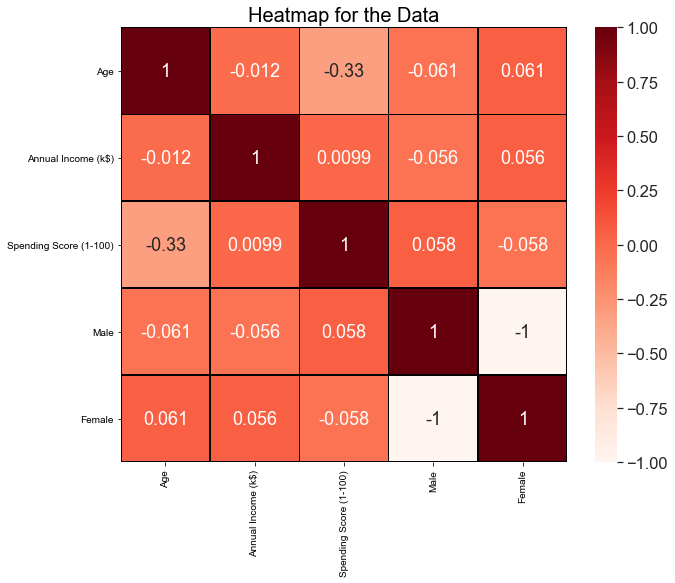

In [64]:
fig, ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=1.5)
ax = sns.heatmap(corr, cmap = 'Reds', annot = True, linewidths=0.5, linecolor='black')
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

from the heatmap we see that there is a less correlation between each variable, which is good since k-means clustering requires each variable to have less correlation between

In this time, we will use unsupervised method of k-means clustering to do a customer segmentation.

let's recall the assumption of k-means clustering

Cluster's shape: all variables should be normally distributed and have the same variance => it is confiremd by the above plot

Clusters' Size: All clusters have the same number of observations.

Relationship between variables: There is little or no correlation between the variables.

</b>Dimensionality reduction</b>

Use Principal Component Analysis (PCA) to reduce the dimension

In [22]:
# first there is a need to convert categorical variable(in this case gender) to the numerical 
# Use style of hot-encoding 
customers["Male"] = customers.Gender.apply(lambda x: 0 if x == "Male" else 1)
customers["Female"] = customers.Gender.apply(lambda x: 0 if x == "Female" else 1)

In [23]:
customers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Male,Female
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,1
2,3,Female,20,16,6,1,0
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,1,0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,0
196,197,Female,45,126,28,1,0
197,198,Male,32,126,74,0,1
198,199,Male,32,137,18,0,1


In [24]:
# in this case since we won't use the customerID for customer segmentation, we will create dataset prompt for PCA dimensional reduction

In [25]:
train = customers.iloc[:, 2:]

In [26]:
train

,Age,Annual Income (k$),Spending Score (1-100),Male,Female
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0
...,...,...,...,...,...
195,35,120,79,1,0
196,45,126,28,1,0
197,32,126,74,0,1
198,32,137,18,0,1


In [27]:
#we are going to use the PCA function from sklearn module
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(train)

In [28]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [29]:
principalDf

,principal component 1,principal component 2
0,-31.869381,-33.001079
1,0.765592,-56.841935
2,-57.407825,-13.126987
3,-2.167187,-53.479276
4,-32.173249,-30.389820
...,...,...
195,58.351958,31.018158
196,19.906647,66.445791
197,58.519749,38.348227
198,20.977153,79.377665


In [30]:
pca.explained_variance_ratio_

array([0.45110884, 0.44084615])

In [31]:
# we see that two components can capture the 99% of variance, so no need to increase the number of principal components to 3 

In [33]:
# Transform samples using the PCA fit
pca_2d = pca.transform(train)

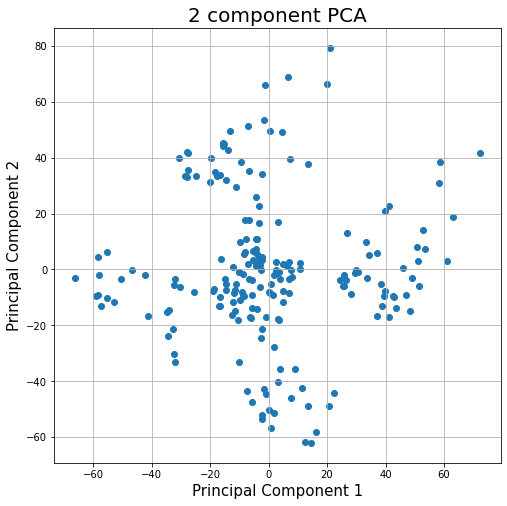

In [34]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalDf['principal component 1']
               , principalDf['principal component 2'])
ax.grid()

In [35]:
# Here, we recieve the scatter plot of principal component analysis 

In [40]:
train

,Age,Annual Income (k$),Spending Score (1-100),Male,Female
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0
...,...,...,...,...,...
195,35,120,79,1,0
196,45,126,28,1,0
197,32,126,74,0,1
198,32,137,18,0,1


K means modelling 

Hyperparameter tuning to find the appropiate number of K.

The Elbow method looks at how the total WSS varies with the number of clusters.  For that, we'll compute k-means for a range of different values of k. Then, we calculate the total WSS. We plot the curve WSS vs. number of clusters.  Finally, we locate the elbow or bend of the plot. This point is considered to be the appropriate number of clusters.

https://en.wikipedia.org/wiki/Elbow_method_(clustering)#:~:text=In%20cluster%20analysis%2C%20the%20elbow,number%20of%20clusters%20to%20use.

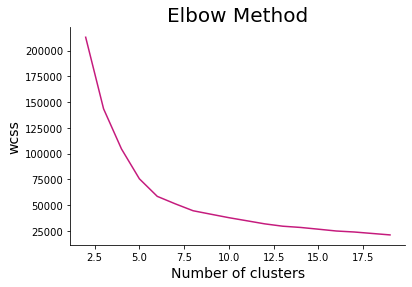

In [53]:
wcss = []
for i in range(2,20):
    km = KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(train)
    wcss.append(km.inertia_)
plt.plot(range(2,20),wcss, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Elbow Method', size=20)
plt.xlabel('Number of clusters', size=14)
plt.ylabel('wcss', size=14)
plt.show() 

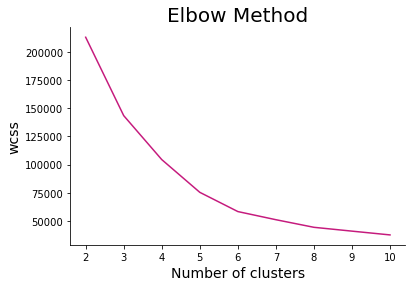

In [55]:
# focus around 1 to 10
wcss = []
for i in range(2,11):
    km = KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(train)
    wcss.append(km.inertia_)
plt.plot(range(2,11),wcss, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Elbow Method', size=20)
plt.xlabel('Number of clusters', size=14)
plt.ylabel('wcss', size=14)
plt.show() 

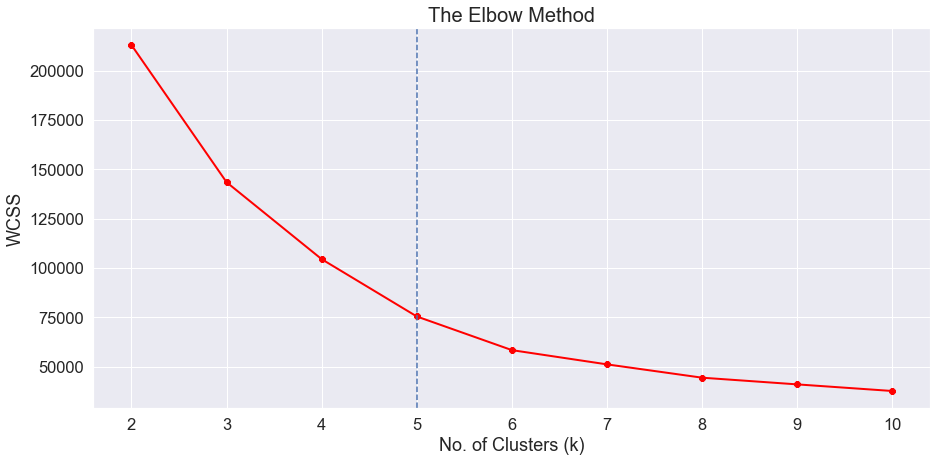

In [66]:
fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(2,11),wcss, linewidth=2, color="red", marker ="8")
plt.axvline(x=5, ls='--')
plt.ylabel('WCSS')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()


In [56]:
# we can said that there is a change around number of cluster =5

In [70]:
from sklearn.cluster import KMeans

kms = KMeans(n_clusters=5, init='k-means++')
kms.fit(train)

KMeans(n_clusters=5)

In [72]:
clusters = train.copy()
clusters['Cluster_Prediction'] = kms.fit_predict(train)
clusters.head()

,Age,Annual Income (k$),Spending Score (1-100),Male,Female,Cluster_Prediction
0,19,15,39,0,1,3
1,21,15,81,0,1,4
2,20,16,6,1,0,3
3,23,16,77,1,0,4
4,31,17,40,1,0,3


In [74]:
clusters = clusters.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'})
clusters.head()

,Age,Annual_Income,Spending_Score,Male,Female,Cluster_Prediction
0,19,15,39,0,1,3
1,21,15,81,0,1,4
2,20,16,6,1,0,3
3,23,16,77,1,0,4
4,31,17,40,1,0,3


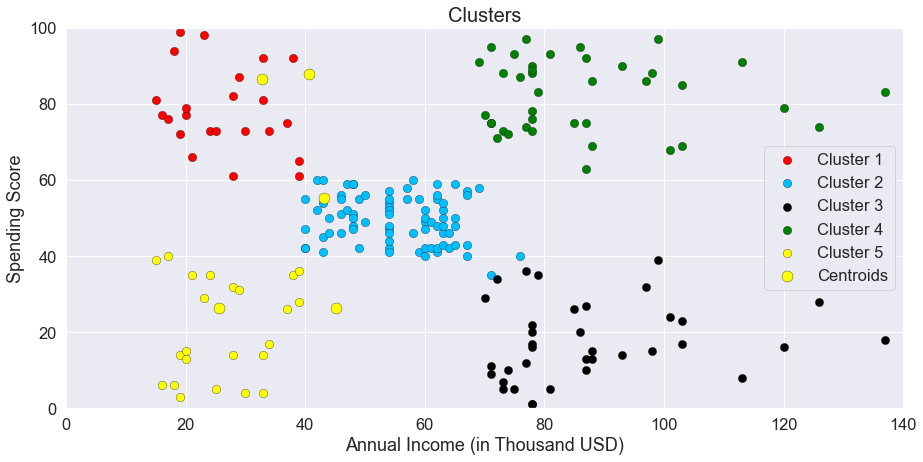

In [77]:
fig, ax = plt.subplots(figsize=(15,7)) 
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 4]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 4]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='red', label='Cluster 1')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 0]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='deepskyblue', label='Cluster 2')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 2]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.2, c='black', label='Cluster 3')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 1]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='green', label='Cluster 4')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 3]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 3]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='yellow', label='Cluster 5')



plt.scatter(x=kms.cluster_centers_[:, 0], y=kms.cluster_centers_[:, 1], s = 120, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='right')
plt.xlim(0,140)
plt.ylim(0,100)
plt.xlabel('Annual Income (in Thousand USD)')
plt.ylabel('Spending Score')
plt.title('Clusters', fontsize = 20)
plt.show()

In [78]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = ["Age", "Annual Income", "Spending", "Male", "Female"])
centroids.index_name = "ClusterID"
centroids["ClusterID"] = centroids.index
centroids = centroids.reset_index(drop=True)
centroids

,Age,Annual Income,Spending,Male,Female,ClusterID
0,45.217391,26.304348,20.913043,0.608696,0.391304,0
1,32.692308,86.538462,82.128205,0.538462,0.461538,1
2,43.088608,55.291139,49.569620,0.582278,0.417722,2
3,40.666667,87.750000,17.583333,0.472222,0.527778,3
4,25.521739,26.304348,78.565217,0.608696,0.391304,4


The business usage of these is when you have the new customers, you can catogorized them to the new group. Increasing the number of training data would increase the accuracy. 